<h1>ADSP 31010 IP01 Linear and Non-Linear Models</h1>

<u>Team Members</u>
- Daniel Sa
- Christian Piantanida
- Kaustubh Patil

**Project**: Pet Adoption speed prediction using LightGBM

**Project Objective**: Every year, millions of stray animals are euthanized in shelters worldwide. Using the profiles collected by PetFinder.my, Malaysia's leading animal welfare platform since 2008, we want to use gradient boosting to help predict which pets can be adopted sooner and identify which features contribute to faster adoption. The insights from this will also help determine breeds and animals which require additional support.



In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import will2live

In [127]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [128]:
#train = pd.read_csv("/content/drive/Shareddrives/PetFinder/train.csv")

#df=pd.read_csv('/content/drive/Shareddrives/PetFinder/train.csv',encoding='latin1')

df=pd.read_csv('train.csv',encoding='latin1')
df = df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

## CLEANING

In [130]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [131]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# remove case sensitivity
df['Description'] = df['Description'].str.lower()

## Remove punctuation
pattern = r'[^\w\s]'
df['Description'] = df['Description'].str.replace(pattern, '')

## Remove stopwords
stop_words = stopwords.words('english')
df['Description'] = df['Description'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))

# Lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

#### WORD COUNT (DESCR) COLUMN

In [132]:
df['DescrWordCount'] = df['Description'].str.split().str.len()

In [133]:
columns_to_update = ['Vaccinated', 'Dewormed', 'Sterilized']
for column in columns_to_update:
    # 1 = Yes , 2=No
    df[column] = df[column].apply(lambda x: 1 if x == 1 else 0)


df.drop(['State','RescuerID','PetID'],axis=1,inplace=True)

Creating useful name columns

In [134]:
# remove case sensitivity
df['Name'] = df['Name'].str.lower()

## Remove punctuation
pattern = r'[^\w\s]'
df['Name'] = df['Name'].str.replace(pattern, '')

## Remove stopwords
#stop_words = stopwords.words('english')
stopwordz=list(stopwords.words('english'))
stopwordz.pop(116)
#stopwordz[116]
stop_words=stopwordz
df['Name'] = df['Name'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Name'] = df['Name'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [135]:
df['Name_Len']=df['Name'].apply(lambda x: len(str(x)))

In [136]:
# number of words in name
df['Name_words']=df['Name'].str.split().str.len()
df['Name_words']

0        1
1        3
2        1
3        1
4        1
        ..
14988    1
14989    3
14990    1
14991    2
14992    1
Name: Name_words, Length: 14993, dtype: int64

In [137]:
df['Breed1'].value_counts()

Breed1
307    5927
266    3634
265    1258
299     342
264     296
       ... 
176       1
214       1
125       1
123       1
81        1
Name: count, Length: 176, dtype: int64

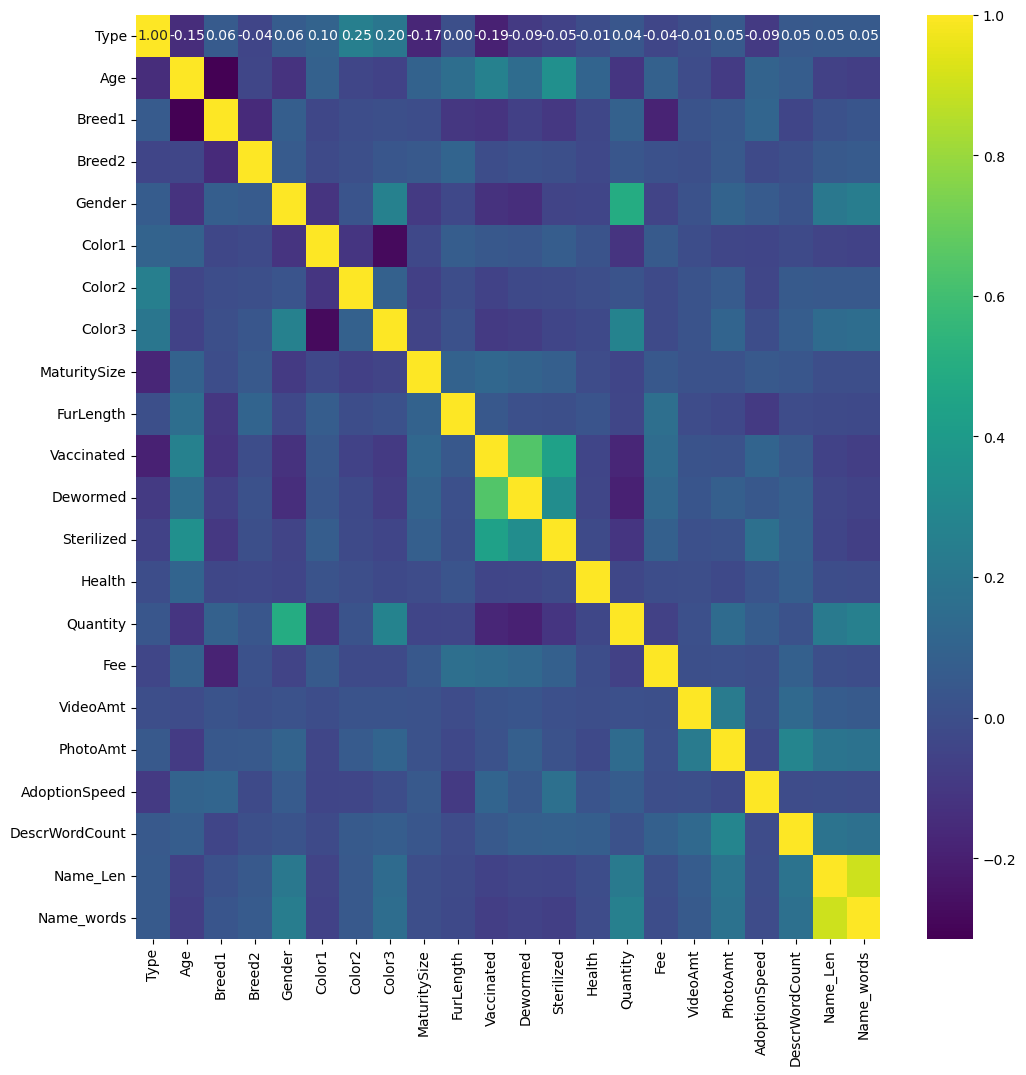

In [138]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.drop(['Name','Description'],axis=1).corr(), annot=True, fmt=".2f",cmap='viridis')
plt.show()

In [139]:
color_map={1:'Black',2:'Brown',3:'Golden',4:'Yellow',5:'Cream',6:'Gray',7:'White',0:'0'}
color_map


{1: 'Black',
 2: 'Brown',
 3: 'Golden',
 4: 'Yellow',
 5: 'Cream',
 6: 'Gray',
 7: 'White',
 0: '0'}

In [140]:
df['Color1']=df['Color1'].replace(color_map)
df['Color2']=df['Color2'].replace(color_map)
df['Color3']=df['Color3'].replace(color_map)

In [141]:
health_map={1:'Healthy',2:'Minor Injury',3:'Serious Injury',0:'Not Specified'}
df['Health']=df['Health'].replace(health_map)

In [142]:
gender_map={1:'Male',2:'Female',3:'Mixed (group)'}
df['Gender']=df['Gender'].replace(gender_map)

In [143]:
type_map={1:'Dog',2:'Cat'}
df['Type']=df['Type'].replace(type_map)

In [144]:
breeds_dict = {
        1: "Affenpinscher",
        2: "Afghan Hound",
        3: "Airedale Terrier",
        4: "Akbash",
        5: "Akita",
        6: "Alaskan Malamute",
        7: "American Bulldog",
        8: "American Eskimo Dog",
        9: "American Hairless Terrier",
        10: "American Staffordshire Terrier",
        11: "American Water Spaniel",
        12: "Anatolian Shepherd",
        13: "Appenzell Mountain Dog",
        14: "Australian Cattle Dog/Blue Heeler",
        15: "Australian Kelpie",
        16: "Australian Shepherd",
        17: "Australian Terrier",
        18: "Basenji",
        19: "Basset Hound",
        20: "Beagle",
        21: "Bearded Collie",
        22: "Beauceron",
        23: "Bedlington Terrier",
        24: "Belgian Shepherd Dog Sheepdog",
        25: "Belgian Shepherd Laekenois",
        26: "Belgian Shepherd Malinois",
        27: "Belgian Shepherd Tervuren",
        28: "Bernese Mountain Dog",
        29: "Bichon Frise",
        30: "Black and Tan Coonhound",
        31: "Black Labrador Retriever",
        32: "Black Mouth Cur",
        33: "Black Russian Terrier",
        34: "Bloodhound",
        35: "Blue Lacy",
        36: "Bluetick Coonhound",
        37: "Boerboel",
        38: "Bolognese",
        39: "Border Collie",
        40: "Border Terrier",
        41: "Borzoi",
        42: "Boston Terrier",
        43: "Bouvier des Flanders",
        44: "Boxer",
        45: "Boykin Spaniel",
        46: "Briard",
        47: "Brittany Spaniel",
        48: "Brussels Griffon",
        49: "Bull Terrier",
        50: "Bullmastiff",
        51: "Cairn Terrier",
        52: "Canaan Dog",
        53: "Cane Corso Mastiff",
        54: "Carolina Dog",
        55: "Catahoula Leopard Dog",
        56: "Cattle Dog",
        57: "Caucasian Sheepdog (Caucasian Ovtcharka)",
        58: "Cavalier King Charles Spaniel",
        59: "Chesapeake Bay Retriever",
        60: "Chihuahua",
        61: "Chinese Crested Dog",
        62: "Chinese Foo Dog",
        63: "Chinook",
        64: "Chocolate Labrador Retriever",
        65: "Chow Chow",
        66: "Cirneco dell'Etna",
        67: "Clumber Spaniel",
        68: "Cockapoo",
        69: "Cocker Spaniel",
        70: "Collie",
        71: "Coonhound",
        72: "Corgi",
        73: "Coton de Tulear",
        74: "Curly-Coated Retriever",
        75: "Dachshund",
        76: "Dalmatian",
        77: "Dandi Dinmont Terrier",
        78: "Doberman Pinscher",
        79: "Dogo Argentino",
        80: "Dogue de Bordeaux",
        81: "Dutch Shepherd",
        82: "English Bulldog",
        83: "English Cocker Spaniel",
        84: "English Coonhound",
        85: "English Pointer",
        86: "English Setter",
        87: "English Shepherd",
        88: "English Springer Spaniel",
        89: "English Toy Spaniel",
        90: "Entlebucher",
        91: "Eskimo Dog",
        92: "Feist",
        93: "Field Spaniel",
        94: "Fila Brasileiro",
        95: "Finnish Lapphund",
        96: "Finnish Spitz",
        97: "Flat-coated Retriever",
        98: "Fox Terrier",
        99: "Foxhound",
        100: "French Bulldog",
        101: "Galgo Spanish Greyhound",
        102: "German Pinscher",
        103: "German Shepherd Dog",
        104: "German Shorthaired Pointer",
        105: "German Spitz",
        106: "German Wirehaired Pointer",
        107: "Giant Schnauzer",
        108: "Glen of Imaal Terrier",
        109: "Golden Retriever",
        110: "Gordon Setter",
        111: "Great Dane",
        112: "Great Pyrenees",
        113: "Greater Swiss Mountain Dog",
        114: "Greyhound",
        115: "Harrier",
        116: "Havanese",
        117: "Hound",
        118: "Hovawart",
        119: "Husky",
        120: "Ibizan Hound",
        121: "Illyrian Sheepdog",
        122: "Irish Setter",
        123: "Irish Terrier",
        124: "Irish Water Spaniel",
        125: "Irish Wolfhound",
        126: "Italian Greyhound",
        127: "Italian Spinone",
        128: "Jack Russell Terrier",
        129: "Jack Russell Terrier (Parson Russell Terrier)",
        130: "Japanese Chin",
        131: "Jindo",
        132: "Kai Dog",
        133: "Karelian Bear Dog",
        134: "Keeshond",
        135: "Kerry Blue Terrier",
        136: "Kishu",
        137: "Klee Kai",
        138: "Komondor",
        139: "Kuvasz",
        140: "Kyi Leo",
        141: "Labrador Retriever",
        142: "Lakeland Terrier",
        143: "Lancashire Heeler",
        144: "Leonberger",
        145: "Lhasa Apso",
        146: "Lowchen",
        147: "Maltese",
        148: "Manchester Terrier",
    149: "Maremma Sheepdog",
    150: "Mastiff",
    151: "McNab",
    152: "Miniature Pinscher",
    153: "Mountain Cur",
    154: "Mountain Dog",
    155: "Munsterlander",
    156: "Neapolitan Mastiff",
    157: "New Guinea Singing Dog",
    158: "Newfoundland Dog",
    159: "Norfolk Terrier",
    160: "Norwegian Buhund",
    161: "Norwegian Elkhound",
    162: "Norwegian Lundehund",
    163: "Norwich Terrier",
    164: "Nova Scotia Duck-Tolling Retriever",
    165: "Old English Sheepdog",
    166: "Otterhound",
    167: "Papillon",
    168: "Patterdale Terrier (Fell Terrier)",
    169: "Pekingese",
    170: "Peruvian Inca Orchid",
    171: "Petit Basset Griffon Vendeen",
    172: "Pharaoh Hound",
    173: "Pit Bull Terrier",
    174: "Plott Hound",
    175: "Podengo Portugueso",
    176: "Pointer",
    177: "Polish Lowland Sheepdog",
    178: "Pomeranian",
    179: "Poodle",
    180: "Portuguese Water Dog",
    181: "Presa Canario",
    182: "Pug",
    183: "Puli",
    184: "Pumi",
    185: "Rat Terrier",
    186: "Redbone Coonhound",
    187: "Retriever",
    188: "Rhodesian Ridgeback",
    189: "Rottweiler",
    190: "Saint Bernard",
    191: "Saluki",
    192: "Samoyed",
    193: "Sarplaninac",
    194: "Schipperke",
    195: "Schnauzer",
    196: "Scottish Deerhound",
    197: "Scottish Terrier Scottie",
    198: "Sealyham Terrier",
    199: "Setter",
    200: "Shar Pei",
    201: "Sheep Dog",
    202: "Shepherd",
    203: "Shetland Sheepdog Sheltie",
    204: "Shiba Inu",
    205: "Shih Tzu",
    206: "Siberian Husky",
    207: "Silky Terrier",
    208: "Skye Terrier",
    209: "Sloughi",
    210: "Smooth Fox Terrier",
    211: "South Russian Ovtcharka",
    212: "Spaniel",
    213: "Spitz",
    214: "Staffordshire Bull Terrier",
    215: "Standard Poodle",
    216: "Sussex Spaniel",
    217: "Swedish Vallhund",
    218: "Terrier",
    219: "Thai Ridgeback",
    220: "Tibetan Mastiff",
    221: "Tibetan Spaniel",
    222: "Tibetan Terrier",
    223: "Tosa Inu",
    224: "Toy Fox Terrier",
    225: "Treeing Walker Coonhound",
    226: "Vizsla",
    227: "Weimaraner",
    228: "Welsh Corgi",
    229: "Welsh Springer Spaniel",
    230: "Welsh Terrier",
    231: "West Highland White Terrier Westie",
    232: "Wheaten Terrier",
    233: "Whippet",
    234: "White German Shepherd",
    235: "Wire Fox Terrier",
    236: "Wire-haired Pointing Griffon",
    237: "Wirehaired Terrier",
    238: "Xoloitzcuintle/Mexican Hairless",
    239: "Yellow Labrador Retriever",
    240: "Yorkshire Terrier Yorkie",
    241: "Abyssinian",
    242: "American Curl",
    243: "American Shorthair",
    244: "American Wirehair",
    245: "Applehead Siamese",
    246: "Balinese",
    247: "Bengal",
    248: "Birman",
    249: "Bobtail",
    250: "Bombay",
    251: "British Shorthair",
    252: "Burmese",
    253: "Burmilla",
    254: "Calico",
    255: "Canadian Hairless",
    256: "Chartreux",
    257: "Chausie",
    258: "Chinchilla",
    259: "Cornish Rex",
    260: "Cymric",
    261: "Devon Rex",
    262: "Dilute Calico",
    263: "Dilute Tortoiseshell",
    264: "Domestic Long Hair",
    265: "Domestic Medium Hair",
    266: "Domestic Short Hair",
    267: "Egyptian Mau",
    268: "Exotic Shorthair",
    269: "Extra-Toes Cat (Hemingway Polydactyl)",
    270: "Havana",
    271: "Himalayan",
    272: "Japanese Bobtail",
    273: "Javanese",
    274: "Korat",
    275: "LaPerm",
    276: "Maine Coon",
    277: "Manx",
    278: "Munchkin",
    279: "Nebelung",
    280: "Norwegian Forest Cat",
    281: "Ocicat",
    282: "Oriental Long Hair",
    283: "Oriental Short Hair",
    284: "Oriental Tabby",
    285: "Persian",
    286: "Pixie-Bob",
    287: "Ragamuffin",
    288: "Ragdoll",
    289: "Russian Blue",
    290: "Scottish Fold",
    291: "Selkirk Rex",
    292: "Siamese",
    293: "Siberian",
    294: "Silver",
    295: "Singapura",
    296: "Snowshoe",
    297: "Somali",
    298: "Sphynx (hairless cat)",
    299: "Tabby",
    300: "Tiger",
    301: "Tonkinese",
    302: "Torbie",
    303: "Tortoiseshell",
    304: "Turkish Angora",
    305: "Turkish Van",
    306: "Tuxedo",
    307: "Mixed Breed"}

In [145]:
df['Breed1']=df['Breed1'].replace(breeds_dict)
df['Breed2']=df['Breed2'].replace(breeds_dict)

In [146]:
adoption_time_dict = {
    0: "Same-Day",
    1: "1st Week",
    2: "1st Month",
    3: "2nd & 3rd Month",
    4: "Not Adopted"
}
df['AdoptionSpeed']=df['AdoptionSpeed'].replace(adoption_time_dict)

## EDA

In [147]:
print(df.isnull().sum())

Type              0
Name              0
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
VideoAmt          0
Description       0
PhotoAmt          0
AdoptionSpeed     0
DescrWordCount    0
Name_Len          0
Name_words        0
dtype: int64


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0
Vaccinated,14993.0,0.393384,0.488517,0.0,0.0,0.0,1.0,1.0
Dewormed,14993.0,0.560061,0.496396,0.0,0.0,1.0,1.0,1.0
Sterilized,14993.0,0.206830,0.405046,0.0,0.0,0.0,0.0,1.0
Quantity,14993.0,1.576069,1.472477,1.0,1.0,1.0,1.0,20.0
Fee,14993.0,21.259988,78.414548,0.0,0.0,0.0,0.0,3000.0
VideoAmt,14993.0,0.056760,0.346185,0.0,0.0,0.0,0.0,8.0
PhotoAmt,14993.0,3.889215,3.487810,0.0,2.0,3.0,5.0,30.0


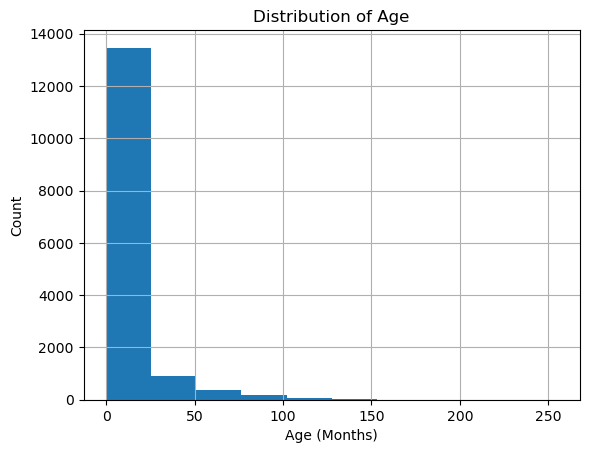

In [149]:
df['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.show()

In [150]:
age_filt_train = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

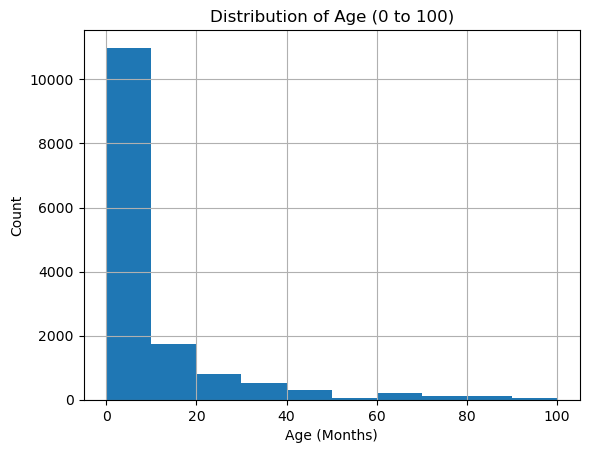

In [151]:
age_filt_train['Age'].hist()
plt.title('Distribution of Age (0 to 100)')
plt.xlabel('Age (Months)')
plt.ylabel('Count')
plt.show()

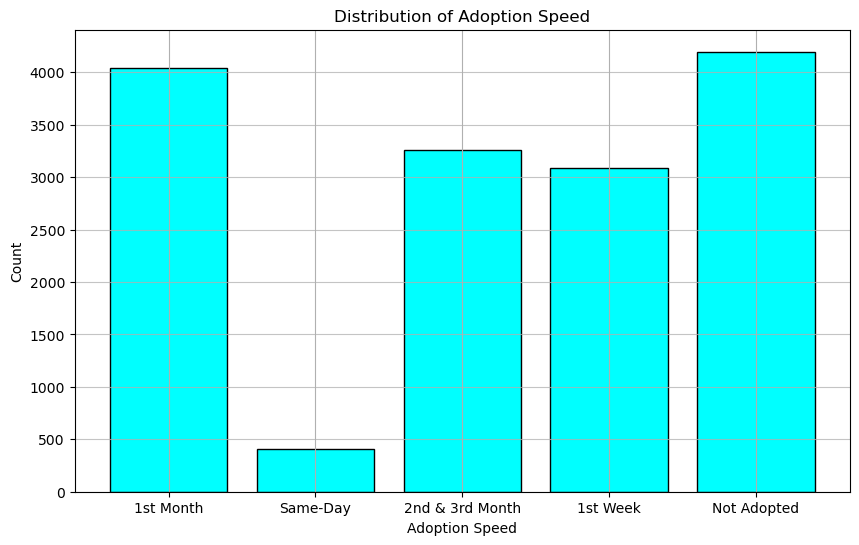

In [152]:
plt.figure(figsize=(10, 6))
df['AdoptionSpeed'].hist(bins=range(0, 5 + 1), rwidth=0.8, align='left', color='cyan', edgecolor='black')
plt.title('Distribution of Adoption Speed')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.xticks(range(0, 5))
plt.grid(axis='y', alpha=0.75)

plt.show()

In [153]:
df['Type'].value_counts()

Type
Dog    8132
Cat    6861
Name: count, dtype: int64

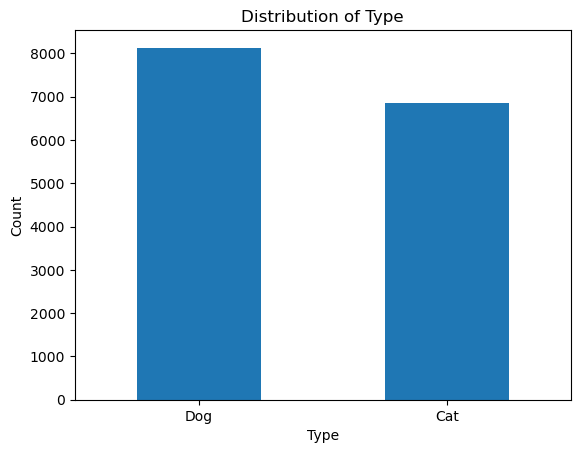

In [154]:
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Dog', 'Cat'], rotation='horizontal')
plt.show()

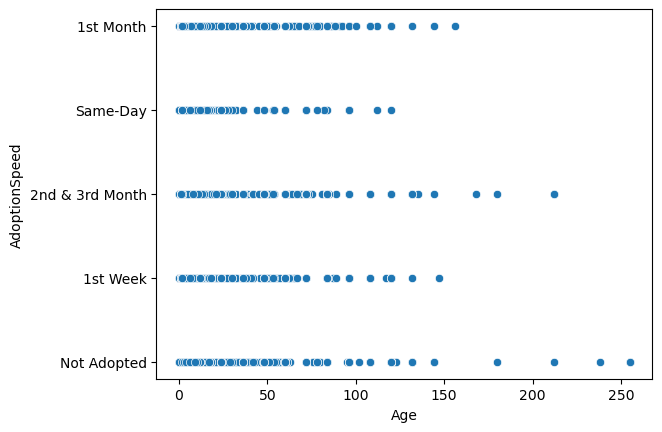

In [155]:
sns.scatterplot(x='Age', y='AdoptionSpeed', data=df)
plt.show()

In [156]:
df['AdoptionSpeed'].value_counts()/len(df)

AdoptionSpeed
Not Adopted        0.279931
1st Month          0.269259
2nd & 3rd Month    0.217368
1st Week           0.206096
Same-Day           0.027346
Name: count, dtype: float64

In [157]:
df['Name'].fillna('BLANK',inplace=True)

In [158]:
df_copy=df.copy()

In [159]:
### Name Column Word2Vec

In [160]:
### Preparing data for w2v
#### it requires a list of sentences as its input, where each sentence is a list of words.

pet_names = list(df['Name'])

# tokenize
sentences = [str(name).lower().split() for name in pet_names]

In [161]:
### train word2vec
from gensim.models import Word2Vec

# train model
model_names = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
# save model
model_names.save("pet_names_word2vec_v1.model")

In [162]:
import numpy as np

In [163]:
## add the vectors to model
### To predict the speed of pet adoption,  average the vectors of all words in a pet name
#### this will create a fixed-sized input vector for each pet name, which can be used for the feature set 




def average_vector(name):
    name=str(name)
    words = name.lower().split()
    vectors = [model_names.wv[word] for word in words if word in model_names.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model_names.vector_size)

# use it on all of the pet names
name_vectors = np.array([average_vector(name) for name in pet_names])


In [164]:
len(pet_names)-len(set(pet_names)),len(pet_names)
# We have 5933 repeated names, from a total of 14993 pet names

(6288, 14993)

In [165]:
len(name_vectors[0])

100

#### Integrating the vectors into our dataset

For each dimension of the word2vec space, you'll have a column for that in your dataframe, ours has 100


In [166]:
# create column names for the vector-based columns
vector_columns=[f'NameVec_{i+1}' for i in range(name_vectors.shape[1])]

In [167]:
vector_df=pd.DataFrame(name_vectors,columns=vector_columns)
vector_df.head(2)

,NameVec_1,NameVec_2,NameVec_3,NameVec_4,NameVec_5,NameVec_6,NameVec_7,NameVec_8,NameVec_9,NameVec_10,...,NameVec_91,NameVec_92,NameVec_93,NameVec_94,NameVec_95,NameVec_96,NameVec_97,NameVec_98,NameVec_99,NameVec_100
0,-0.005467,0.007805,-0.009834,-0.001764,-0.005681,0.002639,-0.006038,-0.009147,0.002002,-0.006709,...,0.002994,0.007085,0.008256,0.004820,0.001259,0.003595,-0.000602,-0.009704,0.006833,-0.000725
1,0.003635,0.011765,-0.001237,0.013523,-0.009234,-0.008574,0.007707,0.013182,-0.000819,-0.000936,...,0.002366,0.012769,-0.016072,-0.010125,-0.008849,-0.006156,-0.004040,0.013268,0.013852,0.020306


In [168]:
# add it back to our dataframe
df = pd.concat([df.reset_index(drop=True), vector_df.reset_index(drop=True)], axis=1)

In [169]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score




#  features and target
X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



# all categorical items to string to avoid issues
for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']


# preprocess
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# define lgbm model with pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.3855


### Looks like the word2vec name columns didn't help, so we'll go back to before we added that


In [170]:
df=df_copy.copy()
df_copy=df.copy()

In [171]:
### Word2Vec Descriptions

In [172]:
## Repeat the Process for the descriptions

descriptions = list(df['Description'])

descr_sentences = [str(word).lower().split() for word in descriptions]

model_descr = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


model_descr.save("descr_word2vec_v1.model")


def average_vector_descr(descr):
    descr=str(descr)
    words = descr.lower().split()

    vectors = [model_descr.wv[word] for word in words if word in model_descr.wv]

    if vectors:
	# if vectors exists, return the mean
        return np.mean(vectors, axis=0)
    else:
	# otherwise, if vectors wasn't able to be understood by the model, then just create a row of zeroes
        return np.zeros(model_descr.vector_size)


descr_vectors = np.array([average_vector(descr) for descr in descriptions])


In [173]:

vector_columns=[f'DescrVec_{i+1}' for i in range(descr_vectors.shape[1])]
vector_df=pd.DataFrame(name_vectors,columns=vector_columns)
df = pd.concat([df.reset_index(drop=True), vector_df.reset_index(drop=True)], axis=1)

In [174]:




#  features and target
X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()



for col in categorical_features:
    df[col] = df[col].astype(str)



X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']



preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

probabilities = clf.predict_proba(X_test)

# df for probabilities
prob_df = pd.DataFrame(probabilities, columns=clf.named_steps['classifier'].classes_)
prob_df['predicted_class'] = y_pred

# eval model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.3855


### Looks like the word2vec columns for descriptions didn't help either
#### we'll go back

In [175]:
df=df_copy.copy()

In [176]:
df['Description'] = df['Description'].fillna('For Adoption')

In [177]:
pd.set_option('display.max_colwidth', None)
texts = df['Description'].values
texts

array(["nibble 3+ month old ball cuteness. energetic playful. rescued couple cat month ago could get neutered time clinic fully scheduled. result little kitty. enough space fund care cat household. looking responsible people take nibble's care.",
       'found alone yesterday near apartment. shaking bring home provide temporary care.',
       'pregnant mother dumped irresponsible owner roadside near shop subang jaya. gave birth roadside. healthy adorable puppies. already dewormed, vaccinated ready go home. tying caging long hour guard dogs. however, acceptable cage tie precautionary purposes. interested adopt pls call me.',
       ..., 'mix breed, good temperament kittens. love humans. friendly.',
       'shy..adventures independent..she hate cages..but love climbing tree rooftops..however loving.',
       'fili love laying around also love sun; laidback quiet.'],
      dtype=object)

## Sentiment Analysis

In [52]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "monologg/bert-base-cased-goemotions-original"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

senti = np.array([])
for text in texts:

    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    outputs = model(**inputs)

    predicted_label_id = torch.argmax(outputs.logits, dim=1).item()
    predicted_emotion = model.config.id2label[predicted_label_id]

    senti = np.append(senti, predicted_emotion)

pred_df = pd.DataFrame({'Text': texts, 'Sentiment': senti})
pred_df.to_csv('Emotion_Detection', index=False)
print(pred_df)


KeyboardInterrupt



In [60]:
pred_df['Sentiment'].value_counts()

Sentiment
neutral           6653
love              2888
admiration        2018
gratitude         1058
caring            1017
optimism           464
approval           214
fear               136
joy                130
curiosity          115
sadness             95
desire              57
amusement           44
surprise            20
excitement          15
disappointment      14
annoyance           12
remorse             10
disapproval         10
realization          8
confusion            5
nervousness          4
anger                2
disgust              2
embarrassment        1
relief               1
Name: count, dtype: int64

In [61]:
len(pred_df),len(df)

(14993, 14993)

In [62]:
pred_df.to_csv('pred_df.csv')

In [63]:
df['Sentiment']=pred_df['Sentiment'].values
df.to_csv('df_new.csv')

In [30]:
len(pd.read_csv('pred_df.csv')),len(df)

(14993, 14993)

## Modeling 

In [178]:
df=pd.read_csv('df_new.csv',encoding='latin1')
df = df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV



X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


for col in categorical_features:
    df[col] = df[col].astype(str)

X = df.drop('AdoptionSpeed', axis=1)
y = df['AdoptionSpeed']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', lgb.LGBMClassifier())])

# grid of parameters for lgbm
param_grid = {
    'classifier__num_leaves': [31, 50, 100],
    'classifier__max_depth': [-1, 10, 20, 40],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 500]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10,
                                   scoring='accuracy', cv=5, verbose=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# use the best one to predict
y_pred = random_search.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Hyperparameter Tuning: {accuracy:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


## The best outcome in the model was only 41% when predicting adoption speed, so we move to simply predicting adoption as a binary.

In [ ]:
df=pd.read_csv('df_new.csv',encoding='latin1')
df = df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
df['ADOPTED_YN'] = (df['AdoptionSpeed'] != 'Not Adopted').astype(int)
df.drop(['AdoptionSpeed'],axis=1,inplace=True)

In [ ]:
df.drop(['Unnamed: 0','Name','Description'],axis=1,inplace=True)

In [ ]:
!pip install lightgbm==2.0.3

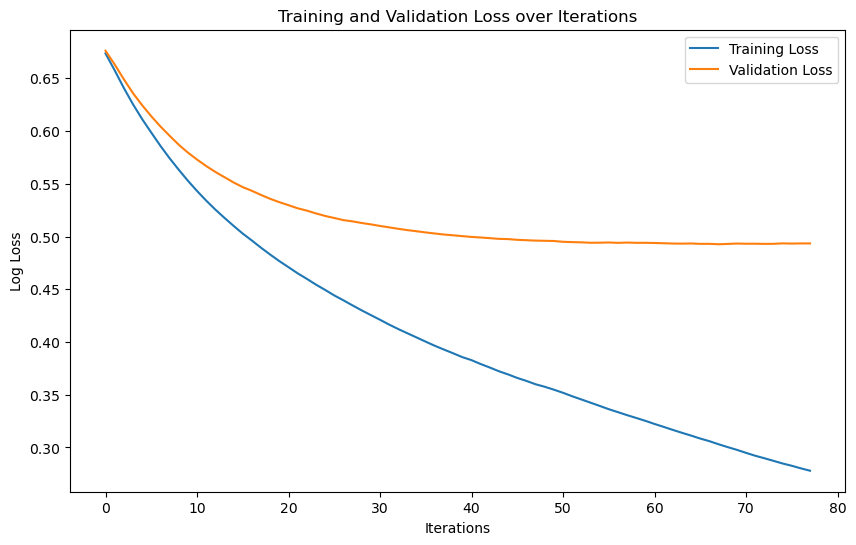

Model Accuracy: 0.7573
Train Log Loss: 0.3030
Test Log Loss: 0.4927


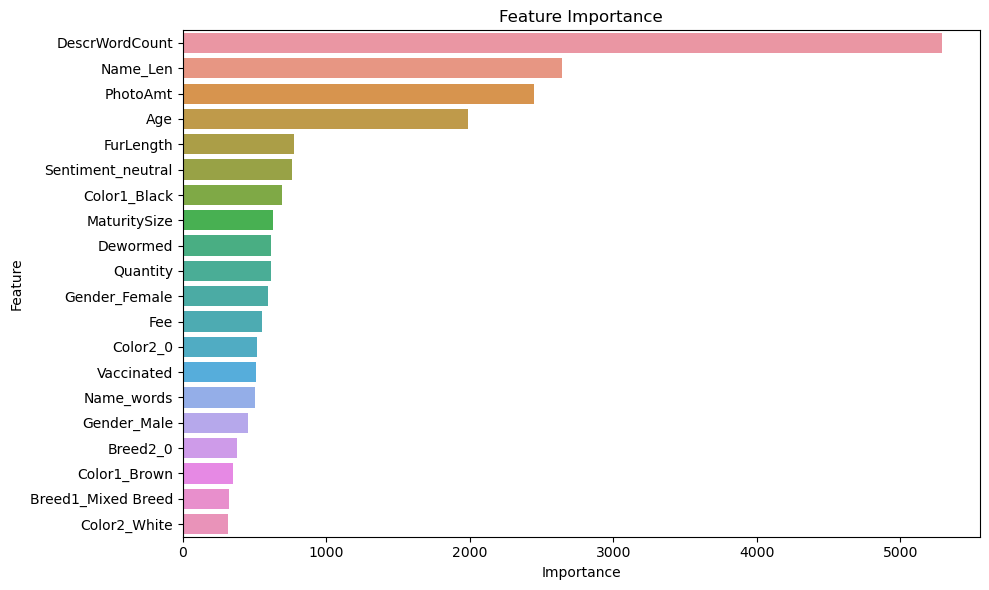

In [103]:
!pip install lightgbm==2.0.3
from sklearn.metrics import accuracy_score, log_loss


X = df.drop('ADOPTED_YN', axis=1)
y = df['ADOPTED_YN']

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# TTSPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Converting to DMatrix (data structure that LightGBM uses)
d_train = lgb.Dataset(X_train_processed, label=y_train)
d_test = lgb.Dataset(X_test_processed, label=y_test)

# LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 2**10,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train model
evals_result = {}  # to record eval results for plotting
model = lgb.train(params,
                  d_train,
                  num_boost_round=100,
                  valid_sets=[d_train, d_test],
                  valid_names=['train', 'valid'],
                  evals_result=evals_result,
                  early_stopping_rounds=10,
                  verbose_eval=False)

# plot log loss during training
plt.figure(figsize=(10, 6))
plt.plot(evals_result['train']['binary_logloss'], label='Training Loss')
plt.plot(evals_result['valid']['binary_logloss'], label='Validation Loss')
plt.title('Training and Validation Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# test set predictions
y_pred_prob = model.predict(X_test_processed)
y_pred = (y_pred_prob >= 0.5).astype(int)



# calc accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {model_accuracy:.4f}")

# log loss
train_log_loss = log_loss(y_train, model.predict(X_train_processed))
test_log_loss = log_loss(y_test, y_pred_prob)
print(f"Train Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")

# FEATURE IMPORTANCE!!
feature_importances = model.feature_importance()

# get feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# combine numerical & categorical feature names
all_feature_names = numerical_features + list(feature_names)

# df for feature importances
df_feature_importances = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=df_feature_importances.head(20))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()
